In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

In [8]:
passengers = pd.read_excel("C:\\Users\\shrey\\Downloads\\Assignment\\18.Forecasting\\Airlines+Data.xlsx")
passengers.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [17]:
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(passengers))

In [18]:
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01', '1949-11-01', '1949-12-01',
               '1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01', '1950-11-01', '1950-12-01',
               '1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01',
               '1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01', '1952-11-01', '1952-12-01',
               '1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01', '1953-08-01',
      

In [19]:
passengers['Month'] = dates.month
passengers['Year'] = dates.year

In [20]:
passengers.head()

,Month,Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [21]:
import calendar
passengers['Month'] = passengers['Month'].apply(lambda x: calendar.month_abbr[x])
passengers.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
passengers = passengers[['Month','Year','Passengers']]

In [22]:
passengers.head()

,Month,Year,Passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


In [23]:
passengers['Date'] = dates
passengers.set_index('Date',inplace=True)

In [24]:
passengers.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


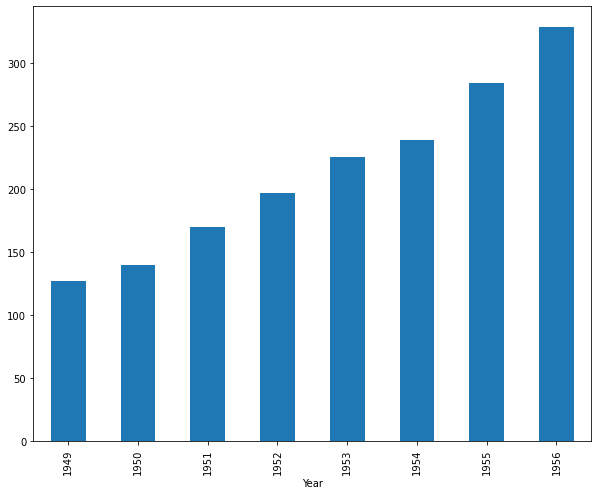

In [25]:
#EDA
plt.figure(figsize=(10,8))
passengers.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

In [26]:
#From the above figure we can see that passengers are increasing with the increase in the year

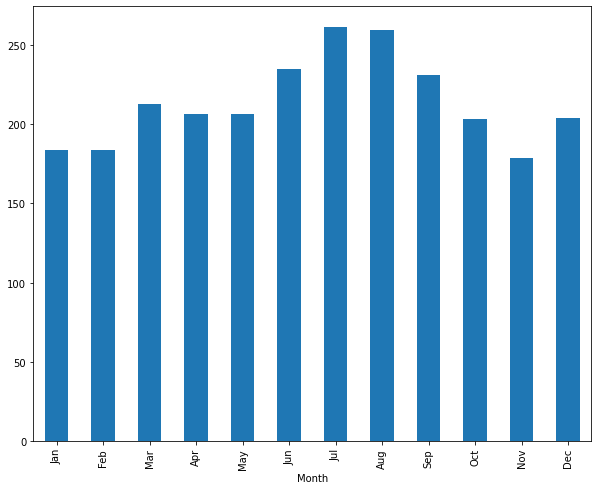

In [27]:
plt.figure(figsize=(10,8))
passengers.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [28]:
#From the above figure we can see that more passengers can be seen between months June to September.

In [29]:
passengers_count = passengers['Passengers']

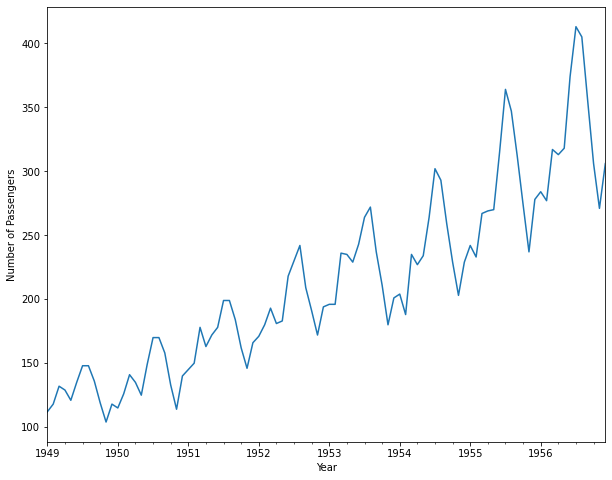

In [30]:

plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [31]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

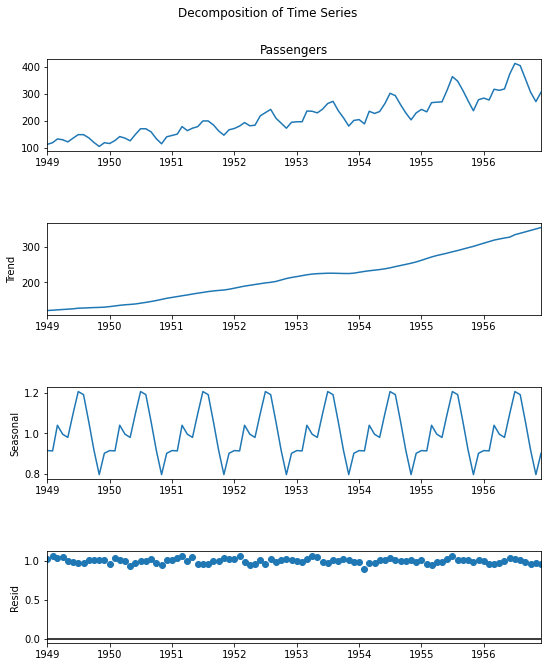

In [32]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

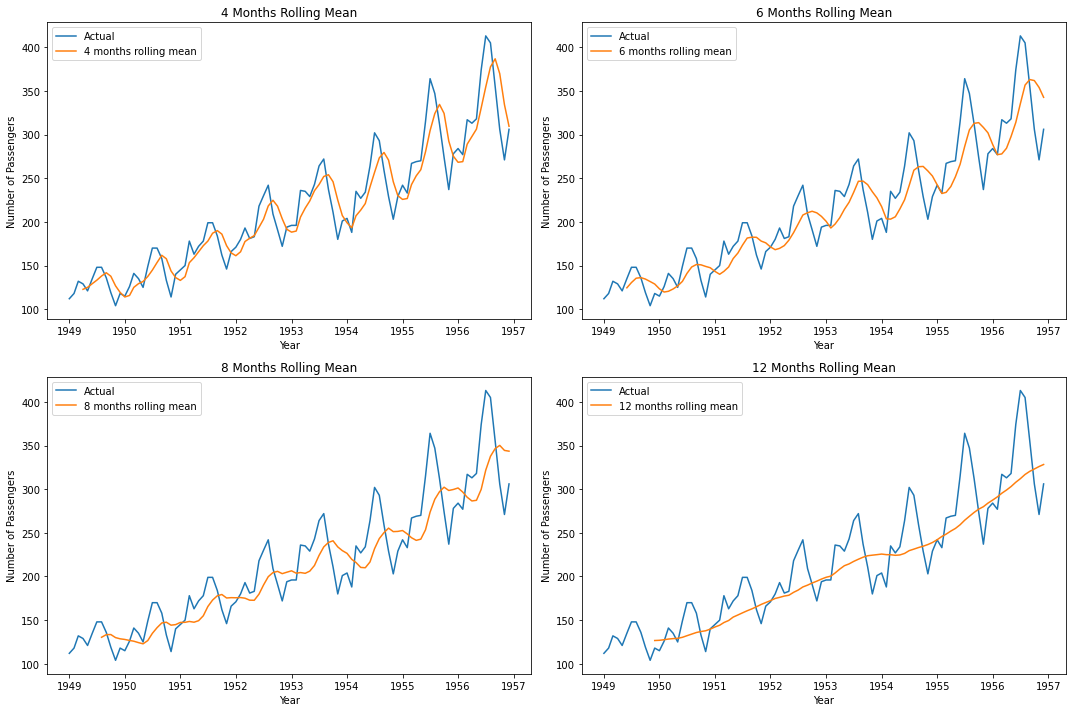

In [33]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(passengers.index,passengers_count,label='Actual')
axes[0][0].plot(passengers.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(passengers.index,passengers_count,label='Actual')
axes[0][1].plot(passengers.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(passengers.index,passengers_count,label='Actual')
axes[1][0].plot(passengers.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(passengers.index,passengers_count,label='Actual')
axes[1][1].plot(passengers.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [34]:
#flights on a month on month basis.
monthly = pd.pivot_table(data=passengers,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1949,1950,1951,1952,1953,1954,1955,1956
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


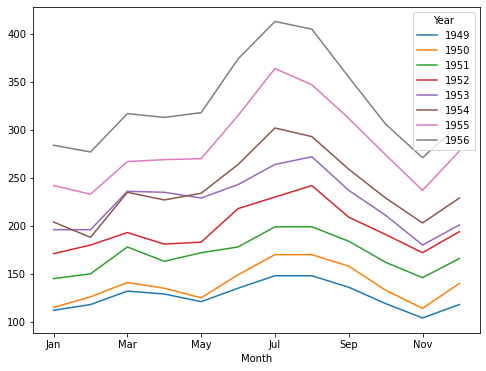

In [35]:

monthly.plot(figsize=(8,6))
plt.show()

In [36]:
yearly = pd.pivot_table(data=passengers,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

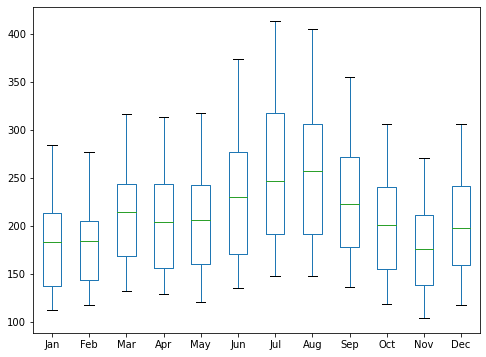

In [37]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

# ARIMA Modelling

In [38]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_count)

(1.3402479596467036,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [39]:
adfuller_results = pd.Series(adfuller(passengers_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


In [40]:
#The p-value is greater than 0.05 (Coinfidence Interval 95%).

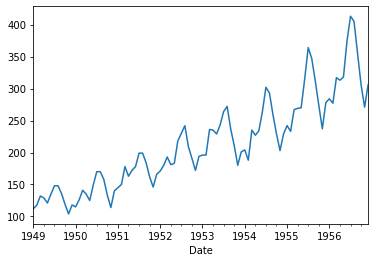

In [41]:
passengers_count.plot()
plt.show()

In [42]:
passengers_log = np.log10(passengers_count)

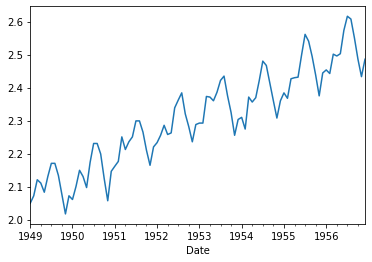

In [45]:
passengers_log.plot()
plt.show()

In [44]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


In [46]:
#The p-value is still greater than 0.05 (Coinfidence Interval 95%).

In [47]:
diff1 = passengers_count.diff(1)
diff1.head()

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

In [48]:
diff1.dropna(axis=0,inplace=True)

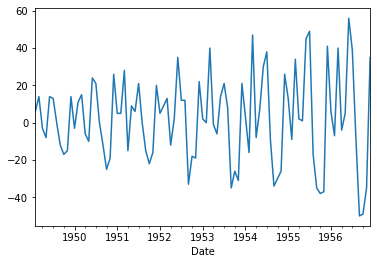

In [50]:
diff1.plot()
plt.show()

In [51]:

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [52]:
#The p-value is still greater than 0.05 (Coinfidence Interval 95%).

In [53]:
log_diff1 = passengers_log.diff(1)
log_diff1.head()

Date
1949-01-01         NaN
1949-02-01    0.022664
1949-03-01    0.048692
1949-04-01   -0.009984
1949-05-01   -0.027804
Name: Passengers, dtype: float64

In [54]:
log_diff1.dropna(axis=0,inplace=True)

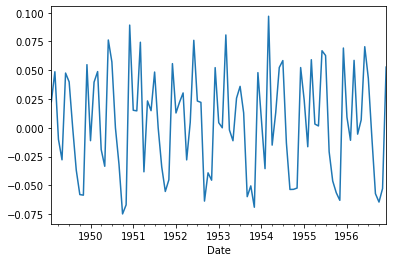

In [55]:

log_diff1.plot()
plt.show()

In [56]:

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [57]:
#p-value is still greateer than 0.05.

In [58]:
log_diff2 = passengers_log.diff(2)
log_diff2.head()

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.071356
1949-04-01    0.038708
1949-05-01   -0.037789
Name: Passengers, dtype: float64

In [59]:
log_diff2.dropna(axis=0,inplace=True)

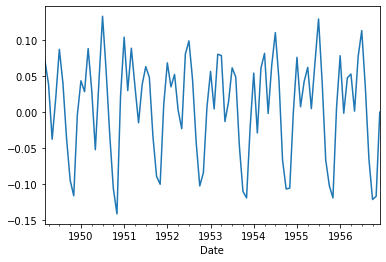

In [60]:
log_diff2.plot()
plt.show()

In [61]:

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


# Iterate the process to find the best values for p, d, q and P, D, Q

In [62]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [63]:

# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [64]:

import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        try:
            temp_model = sm.tsa.statespace.SARIMAX(log_diff2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-401.0866919697577


# Predict sales on in-sample date using the best fit ARIMA model

In [65]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

In [66]:
sarima_results = sarima.fit()
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.543
Date:                            Thu, 05 Aug 2021   AIC                           -401.087
Time:                                    17:37:17   BIC                           -389.177
Sample:                                03-01-1949   HQIC                          -396.312
                                     - 12-01-1956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3172      0.119     -2.672      0.008      -0.550      -0.085
ma.L1          0.9864      0.333   

In [67]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)

In [68]:
prediction.predicted_mean

1960-01-01    0.070108
Freq: MS, dtype: float64

In [70]:
predicted_values = np.power(10,prediction.predicted_mean)
predicted_values

1960-01-01    1.17519
Freq: MS, dtype: float64

In [71]:
actual = passengers_count['1960-01-01':]
actual

Series([], Name: Passengers, dtype: int64)

In [72]:
# mean absolute percentage error
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

nan

In [73]:
# mean square error
mse = np.mean((actual - predicted_values) ** 2)
mse

nan

# Forecast sales using the best fit ARIMA model

In [74]:

# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [75]:
pred_ci_99.head()

,lower Passengers,upper Passengers
1957-01-01,0.034290,0.102465
1957-02-01,-0.038099,0.043576
1957-03-01,0.013266,0.096177
1957-04-01,0.015897,0.098920
1957-05-01,-0.045506,0.037522


In [76]:
pred_ci_95.head()

,lower Passengers,upper Passengers
1957-01-01,0.034290,0.102465
1957-02-01,-0.038099,0.043576
1957-03-01,0.013266,0.096177
1957-04-01,0.015897,0.098920
1957-05-01,-0.045506,0.037522


In [77]:
n_steps = 36
idx = pd.date_range(passengers_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [78]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
1956-12-01,1.170516,1.082157,1.266090
1957-01-01,1.006326,0.916012,1.105544
1957-02-01,1.134284,1.031017,1.247893
1957-03-01,1.141323,1.037282,1.255799
1957-04-01,0.990850,0.900521,1.090240


In [79]:

fc_99.head()

,lower_ci_99,upper_ci_99
1956-12-01,1.082157,1.266090
1957-01-01,0.916012,1.105544
1957-02-01,1.031017,1.247893
1957-03-01,1.037282,1.255799
1957-04-01,0.900521,1.090240


In [80]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1956-12-01,1.170516,1.082157,1.266090,1.082157,1.266090
1957-01-01,1.006326,0.916012,1.105544,0.916012,1.105544
1957-02-01,1.134284,1.031017,1.247893,1.031017,1.247893
1957-03-01,1.141323,1.037282,1.255799,1.037282,1.255799
1957-04-01,0.990850,0.900521,1.090240,0.900521,1.090240


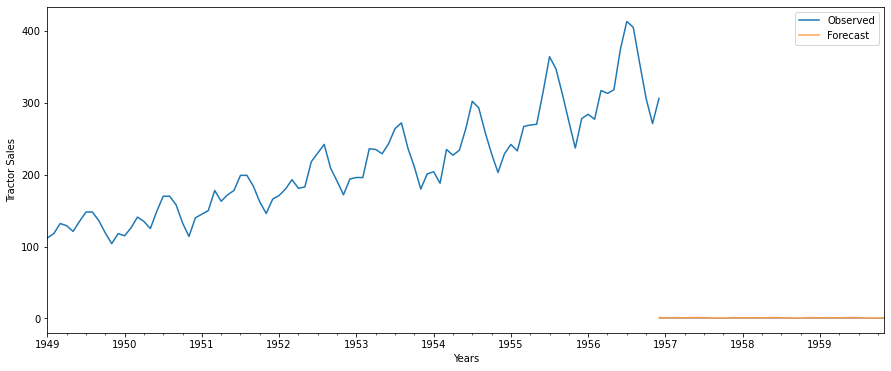

In [81]:

# plot the forecast along with the confidence band
axis = passengers_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

In [82]:
#Diagnostics
#1. Errors follows normality
#2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
#3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

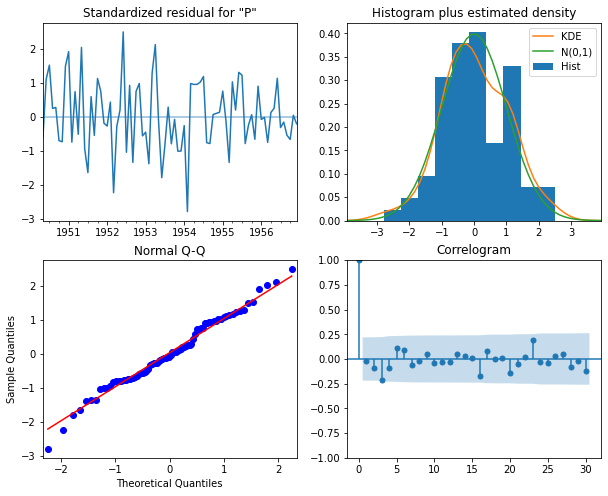

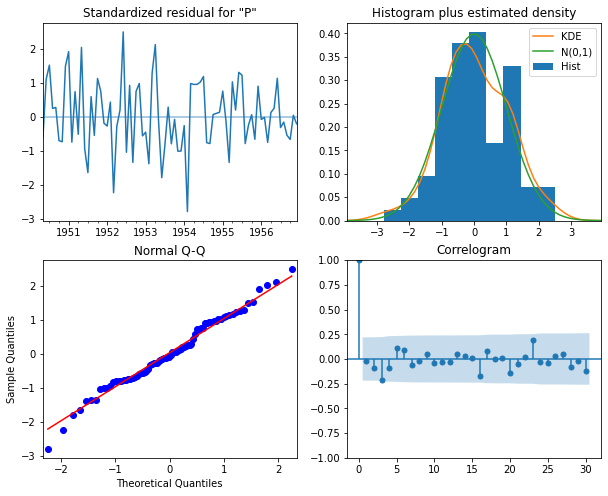

In [83]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))